Null values count per column:
Text     0
label    0
dtype: int64
Precision (Fake): 0.992798353909465
Recall (Fake): 0.9917780061664954
F1-Score (Fake): 0.9922879177377892

Full Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99       973
        Real       0.99      0.99      0.99      1007

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



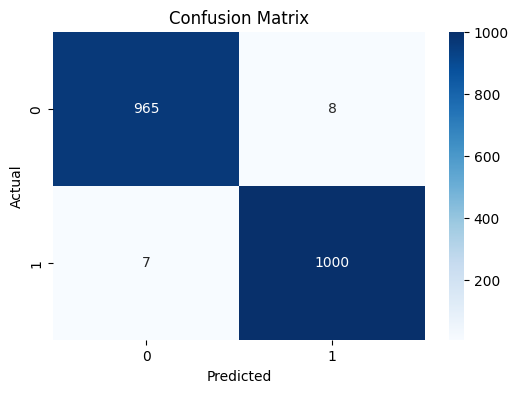

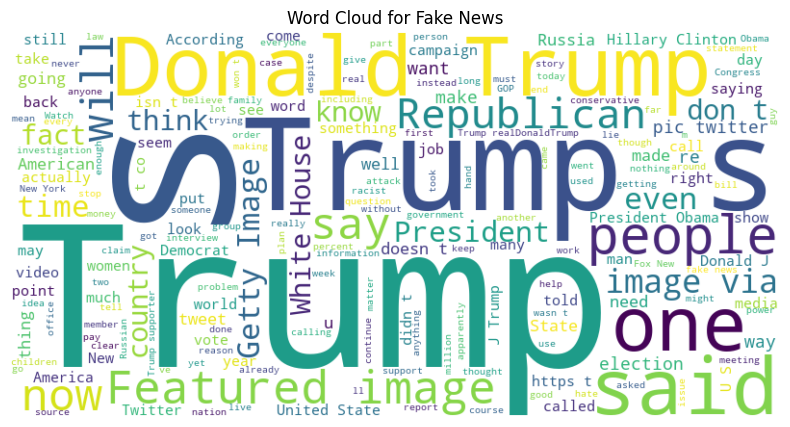

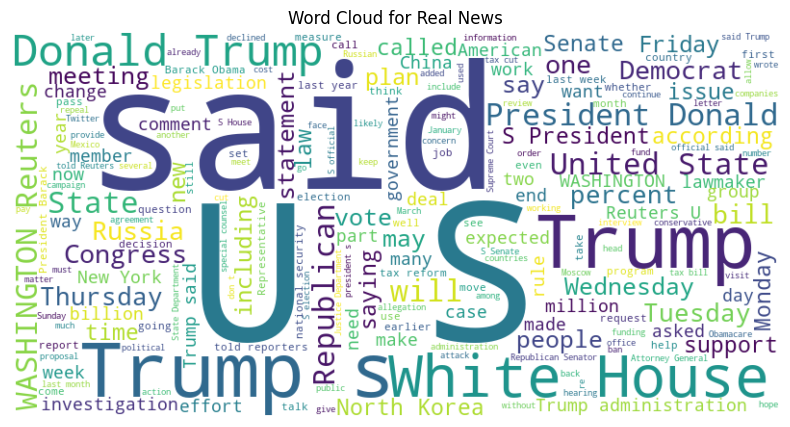

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix

# Load dataset
df = pd.read_csv("fake_and_real_news.csv")

# Check for null values
print("Null values count per column:")
print(df.isnull().sum())

# Drop rows with null values if any
df = df.dropna()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df["Text"], df["label"], test_size=0.2, random_state=42)

# Build pipeline: TF-IDF vectorization + Logistic Regression
model = make_pipeline(TfidfVectorizer(), LogisticRegression())

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)


# Calculate precision, recall, and f1-score for the "Fake" class
precision = precision_score(y_test, y_pred, pos_label='Fake')
recall = recall_score(y_test, y_pred, pos_label='Fake')
f1 = f1_score(y_test, y_pred, pos_label='Fake')

print("Precision (Fake):", precision)
print("Recall (Fake):", recall)
print("F1-Score (Fake):", f1)

print("\nFull Classification Report:")
print(classification_report(y_test, y_pred))

# -------------------- Visualization --------------------

# 1. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2. Word Clouds for each class
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Combine all texts for each label
fake_text = " ".join(df[df['label'] == 'Fake']["Text"])
real_text = " ".join(df[df['label'] == 'Real']["Text"])

generate_wordcloud(fake_text, "Word Cloud for Fake News")
generate_wordcloud(real_text, "Word Cloud for Real News")